In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import random
import pandas as pd
from matplotlib import gridspec
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from datetime import datetime
import time
import corner
import emcee
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy import odr


In [2]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [3]:
Dist_i = pd.read_csv("MLratio_i_distances_noCorrection.csv", sep=',')

for col in Dist_i.columns:
    newcol = col.strip()
    Dist_i.rename(columns={col:newcol}, inplace=True)
Dist_i = Dist_i.set_index("PGC")

# Dist_i = Dist_i[["DM_75","DMi_fid"]]

Dist_i.head(10)

,DM_75,DMi_fid,Mass_HI,Ms_i,Mb,F21,eF21,Qs,DMav_i,eDM_i,eDM_i_adj
PGC,,,,,,,,,,,
4,34.011709,33.411845,1.806150e+09,2.602457e+09,5.004637e+09,1.905,0.07,5.0,33.403479,0.216217,0.367329
16,34.491034,34.646527,1.754429e+09,2.405546e+10,2.638885e+10,1.190,0.20,5.0,34.647717,0.307666,0.390134
55,34.167913,33.811232,4.707702e+09,2.271251e+09,8.532494e+09,4.300,0.32,5.0,33.810049,0.262449,0.378858
68,35.108989,34.868603,4.193694e+09,1.157965e+10,1.715727e+10,1.610,0.27,5.0,34.869965,0.432587,0.432587
70,34.900087,35.358661,1.790008e+10,4.021006e+10,6.401717e+10,8.330,0.12,5.0,35.345340,0.215603,0.367176
76,34.937682,34.747816,9.843772e+09,7.655490e+10,8.964712e+10,4.425,0.11,5.0,34.755812,0.258058,0.377763
92,34.390188,32.893854,5.078582e+09,4.164620e+09,1.091913e+10,3.780,0.08,5.0,32.892858,0.212993,0.366525
96,36.577579,36.537370,2.951715e+10,1.909552e+11,2.302130e+11,2.930,0.16,5.0,36.527521,0.252771,0.376445
102,34.275251,34.317622,7.656358e+09,6.680367e+10,7.698663e+10,6.335,0.12,5.0,34.325450,0.242235,0.373817


In [4]:
df = pd.read_csv("MLratio_z_distances_noCorrection.csv", sep=',')

for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)
Dist_z = df.set_index("PGC")

# Dist_z = df[["DMz_fid"]]

Dist_z.head(10)

,DM_75,DMz_fid,Mass_HI,Ms_z,Mb,F21,eF21,Qs,DMav_z,eDM_z,eDM_z_adj
PGC,,,,,,,,,,,
4,34.011709,33.429158,1.806150e+09,2.531358e+09,4.933538e+09,1.905,0.07,5.0,33.424124,0.179128,0.364809
16,34.491034,34.588899,1.754429e+09,2.546793e+10,2.780132e+10,1.190,0.20,5.0,34.573831,0.264153,0.387860
55,34.167913,33.810978,4.707702e+09,2.249444e+09,8.510687e+09,4.300,0.32,5.0,33.803723,0.244065,0.382414
68,35.108989,34.775535,4.193694e+09,1.278220e+10,1.835981e+10,1.610,0.27,5.0,34.785024,0.396225,0.423668
70,34.900087,35.260573,1.790008e+10,4.492259e+10,6.872970e+10,8.330,0.12,5.0,35.254123,0.152729,0.357652
76,34.937682,34.704495,9.843772e+09,8.005030e+10,9.314252e+10,4.425,0.11,5.0,34.697032,0.201116,0.370770
92,34.390188,32.854781,5.078582e+09,4.401750e+09,1.115626e+10,3.780,0.08,5.0,32.859501,0.189271,0.367559
96,36.577579,36.549721,2.951715e+10,1.893309e+11,2.285887e+11,2.930,0.16,5.0,36.555897,0.176891,0.364202
102,34.275251,34.309921,7.656358e+09,6.747926e+10,7.766222e+10,6.335,0.12,5.0,34.305925,0.173711,0.363340


In [5]:
df = pd.read_csv("MLratio_r_distances_noCorrection.csv", sep=',')

for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)
Dist_r = df.set_index("PGC")

# Dist_r = df[["DMr_fid"]]

Dist_r.head(10)

,DM_75,DMr_fid,Mass_HI,Ms_r,Mb,F21,eF21,Qs,DMav_r,eDM_r,eDM_r_adj
PGC,,,,,,,,,,,
4,34.011709,33.455736,1.806150e+09,2.484183e+09,4.886363e+09,1.905,0.07,5.0,33.447798,0.198412,0.368703
16,34.491034,34.650372,1.754429e+09,2.379105e+10,2.612444e+10,1.190,0.20,5.0,34.655990,0.293615,0.391889
55,34.167913,33.823771,4.707702e+09,2.278585e+09,8.539828e+09,4.300,0.32,5.0,33.822444,0.252187,0.381800
68,35.108989,34.827452,4.193694e+09,1.210864e+10,1.768626e+10,1.610,0.27,5.0,34.835160,0.409007,0.419992
70,34.900087,35.355409,1.790008e+10,4.004375e+10,6.385086e+10,8.330,0.12,5.0,35.360129,0.173582,0.362656
76,34.937682,34.731094,9.843772e+09,7.701459e+10,9.010680e+10,4.425,0.11,5.0,34.716170,0.220414,0.374062
92,34.390188,32.921601,5.078582e+09,4.079203e+09,1.083372e+10,3.780,0.08,5.0,32.926633,0.192924,0.367366
96,36.577579,36.569312,2.951715e+10,1.826129e+11,2.218707e+11,2.930,0.16,5.0,36.566613,0.211600,0.371915
102,34.275251,34.297464,7.656358e+09,6.739076e+10,7.757371e+10,6.335,0.12,5.0,34.299905,0.200235,0.369147


In [6]:
df = pd.read_csv("MLratio_W1_distances_noCorrection.csv", sep=',')

for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)
Dist_W1 = df.set_index("PGC")

Dist_W1 = Dist_W1.rename(columns={'DMw1_fid':'DM1_fid'})

# Dist_W1 = Dist_W1[["DMw1_fid"]]

Dist_W1.head(10)

,DM_75,DM1_fid,Mass_HI,Ms_W1,Mb,F21,eF21,Qw,DMav_W1,eDM_W1,eDM_W1_adj
PGC,,,,,,,,,,,
2,34.349020,34.487005,6.118492e+09,1.426708e+11,1.508084e+11,4.730,0.81,5.0,34.556356,0.307386,0.394828
4,34.011709,33.712843,1.806150e+09,1.844431e+09,4.246611e+09,1.905,0.07,4.0,33.696373,0.189786,0.337196
12,34.779466,34.984702,6.537934e+09,4.431121e+10,5.300666e+10,3.400,0.58,5.0,35.015976,0.255109,0.369209
16,34.491034,34.658557,1.754429e+09,2.350395e+10,2.583734e+10,1.190,0.20,5.0,34.686649,0.281563,0.382173
55,34.167913,33.945915,4.707702e+09,1.889488e+09,8.150731e+09,4.300,0.32,4.0,33.934161,0.244896,0.364204
68,35.108989,34.701820,4.193694e+09,1.407284e+10,1.965045e+10,1.610,0.27,5.0,34.691841,0.400005,0.440218
70,34.900087,35.145457,1.790008e+10,4.909873e+10,7.290584e+10,8.330,0.12,5.0,35.165898,0.190872,0.337729
76,34.937682,34.829031,9.843772e+09,6.838351e+10,8.147573e+10,4.425,0.11,5.0,34.853023,0.227400,0.355629
94,33.849365,33.852255,2.947329e+09,2.368500e+09,6.288448e+09,3.610,0.62,4.0,33.864025,0.318663,0.400355


In [7]:
Dist_riz = pd.read_csv("MLratio_riz_distances_noCorrection.csv", sep=',')

for col in Dist_riz.columns:
    newcol = col.strip()
    Dist_riz.rename(columns={col:newcol}, inplace=True)
Dist_riz = Dist_riz.set_index("PGC")

# Dist_riz = Dist_riz[["DMriz_fid"]]

Dist_riz.head(10)

,DM_75,DMriz_fid,Mass_HI,Ms_riz,Mb,F21,eF21,Qs,DMav_riz,eDM_riz,eDM_riz_adj
PGC,,,,,,,,,,,
4,34.011709,33.422210,1.806150e+09,2.530873e+09,4.933053e+09,1.905,0.07,5.0,33.433770,0.178965,0.363044
16,34.491034,34.623501,1.754429e+09,2.427506e+10,2.660845e+10,1.190,0.20,5.0,34.646877,0.275228,0.390030
55,34.167913,33.803648,4.707702e+09,2.262864e+09,8.524107e+09,4.300,0.32,5.0,33.804574,0.252732,0.383723
68,35.108989,34.814418,4.193694e+09,1.211590e+10,1.769351e+10,1.610,0.27,5.0,34.808253,0.402756,0.425781
70,34.900087,35.317702,1.790008e+10,4.146816e+10,6.527527e+10,8.330,0.12,5.0,35.327256,0.157862,0.357128
76,34.937682,34.723859,9.843772e+09,7.728816e+10,9.038038e+10,4.425,0.11,5.0,34.721157,0.198424,0.368499
92,34.390188,32.880084,5.078582e+09,4.196385e+09,1.095090e+10,3.780,0.08,5.0,32.870958,0.181891,0.363864
96,36.577579,36.547617,2.951715e+10,1.864110e+11,2.256688e+11,2.930,0.16,5.0,36.547343,0.187191,0.365350
102,34.275251,34.304145,7.656358e+09,6.674524e+10,7.692820e+10,6.335,0.12,5.0,34.314682,0.176078,0.362234


In [8]:
# df = pd.read_csv("btfr_brent_updated.csv", sep='|')

# for col in df.columns:
#     newcol = col.strip()
#     df.rename(columns={col:newcol}, inplace=True)
    
# df = df.set_index("PGC")   

# db = df[["Vls"]]

# db.head()

In [9]:
def lambada(X):
    
    if ~np.isnan(X[col+"_riz"]):
        return X[col+"_riz"]
    elif ~np.isnan(X[col+"_i"]):
        return X[col+"_i"]
    elif ~np.isnan(X[col+"_r"]):
        return X[col+"_r"]
    elif ~np.isnan(X[col+"_z"]):
        return X[col+"_z"]
    else:
        return X[col]

df = Dist_i.join(Dist_riz, how='left', lsuffix='_i', rsuffix='_riz')
df = df.join(Dist_r, how='left')
df = df.join(Dist_z, how='left', lsuffix='_r', rsuffix='_z')
df = df.join(Dist_W1, how='outer') # .join(db)

df['Qs'] = df['Qs_i']
df['DM_75_w1'] = df['DM_75']

commons = ['DM_75', 'Mass_HI', 'Mb', 'F21', 'eF21', 'Qs']
for col in commons:
    df[col] = df.apply(lambada, axis=1)


df.head(10)

,DM_75_i,DMi_fid,Mass_HI_i,Ms_i,Mb_i,F21_i,eF21_i,Qs_i,DMav_i,eDM_i,...,Ms_W1,Mb,F21,eF21,Qw,DMav_W1,eDM_W1,eDM_W1_adj,Qs,DM_75_w1
PGC,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.426708e+11,1.508084e+11,4.730,0.81,5.0,34.556356,0.307386,0.394828,NaN,34.349020
4,34.011709,33.411845,1.806150e+09,2.602457e+09,5.004637e+09,1.905,0.07,5.0,33.403479,0.216217,...,1.844431e+09,4.933053e+09,1.905,0.07,4.0,33.696373,0.189786,0.337196,5.0,34.011709
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.431121e+10,5.300666e+10,3.400,0.58,5.0,35.015976,0.255109,0.369209,NaN,34.779466
16,34.491034,34.646527,1.754429e+09,2.405546e+10,2.638885e+10,1.190,0.20,5.0,34.647717,0.307666,...,2.350395e+10,2.660845e+10,1.190,0.20,5.0,34.686649,0.281563,0.382173,5.0,34.491034
55,34.167913,33.811232,4.707702e+09,2.271251e+09,8.532494e+09,4.300,0.32,5.0,33.810049,0.262449,...,1.889488e+09,8.524107e+09,4.300,0.32,4.0,33.934161,0.244896,0.364204,5.0,34.167913
68,35.108989,34.868603,4.193694e+09,1.157965e+10,1.715727e+10,1.610,0.27,5.0,34.869965,0.432587,...,1.407284e+10,1.769351e+10,1.610,0.27,5.0,34.691841,0.400005,0.440218,5.0,35.108989
70,34.900087,35.358661,1.790008e+10,4.021006e+10,6.401717e+10,8.330,0.12,5.0,35.345340,0.215603,...,4.909873e+10,6.527527e+10,8.330,0.12,5.0,35.165898,0.190872,0.337729,5.0,34.900087
76,34.937682,34.747816,9.843772e+09,7.655490e+10,8.964712e+10,4.425,0.11,5.0,34.755812,0.258058,...,6.838351e+10,9.038038e+10,4.425,0.11,5.0,34.853023,0.227400,0.355629,5.0,34.937682
92,34.390188,32.893854,5.078582e+09,4.164620e+09,1.091913e+10,3.780,0.08,5.0,32.892858,0.212993,...,NaN,1.095090e+10,3.780,0.08,NaN,NaN,NaN,NaN,5.0,NaN


In [10]:
old = pd.read_csv("../calibrators/DMs_EDD.csv.test", sep='|')

for col in old.columns:
    newcol = col.strip()
    old.rename(columns={col:newcol}, inplace=True)
old = old.set_index("pgc")

# oldCols = ["P0", "ggg", "rrr", "iii", "zzz"]
# for col in oldCols:
#     old[col] = old[col].apply(lambda x: np.float(x))


df = df.join(old, how='left', lsuffix='_new', rsuffix='_old')

df.head()

,DM_75_i,DMi_fid,Mass_HI_i,Ms_i,Mb_i,F21_i,eF21_i,Qs_i,DMav_i,eDM_i,...,pgc1,Nest,Vmodg,Nkt,N15,sglg,sgbg,RS,P0,DM_src
PGC,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73150,200275,4976,0,7,341.4922,20.7395,2,2.02,2
4,34.011709,33.411845,1.806150e+09,2.602457e+09,5.004637e+09,1.905,0.07,5.0,33.403479,0.216217,...,120,202766,4154,0,0,316.0587,18.4514,2,-2.75,1
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,210177,6279,0,1,286.4249,11.3510,2,0.56,2
16,34.491034,34.646527,1.754429e+09,2.405546e+10,2.638885e+10,1.190,0.20,5.0,34.647717,0.307666,...,16,211419,5434,0,1,287.6120,11.7030,2,0.92,1
55,34.167913,33.811232,4.707702e+09,2.271251e+09,8.532494e+09,4.300,0.32,5.0,33.810049,0.262449,...,55,0,4507,0,0,327.0996,19.7763,2,-2.83,1


In [11]:
for col in df.columns:
    print(col)

DM_75_i
DMi_fid
Mass_HI_i
Ms_i
Mb_i
F21_i
eF21_i
Qs_i
DMav_i
eDM_i
eDM_i_adj
DM_75_riz
DMriz_fid
Mass_HI_riz
Ms_riz
Mb_riz
F21_riz
eF21_riz
Qs_riz
DMav_riz
eDM_riz
eDM_riz_adj
DM_75_r
DMr_fid
Mass_HI_r
Ms_r
Mb_r
F21_r
eF21_r
Qs_r
DMav_r
eDM_r
eDM_r_adj
DM_75_z
DMz_fid
Mass_HI_z
Ms_z
Mb_z
F21_z
eF21_z
Qs_z
DMav_z
eDM_z
eDM_z_adj
DM_75
DM1_fid
Mass_HI
Ms_W1
Mb
F21
eF21
Qw
DMav_W1
eDM_W1
eDM_W1_adj
Qs
DM_75_w1
Vh
Vls
V3k
Vmod
f_cosmology
logWimx
logWimx_e
inc
Sqlt
Wqlt
DM_best
dDM_best
DMr
dDMr
RMS_r
DMr_raw
DMi
dDMi
RMS_i
DMi_raw
DMz
dDMz
RMS_z
DMz_raw
DM_w1
dDM_w1
RMS_w1
DMw1_raw
ggg
rrr
iii
zzz
w1
w2
RA
DEC
gl
gb
sgl
sgb
pgc1
Nest
Vmodg
Nkt
N15
sglg
sgbg
RS
P0
DM_src


In [12]:
len(df)

10154

In [13]:
df['logMs_riz'] = np.log10(df.Ms_riz)
df['logMs_r'] = np.log10(df.Ms_r)
df['logMs_i'] = np.log10(df.Ms_i)
df['logMs_z'] = np.log10(df.Ms_z)
df['logMs_W1'] = np.log10(df.Ms_W1)

In [14]:
df[['DMr_fid', 'DMi_fid', 'DMz_fid', 'DMriz_fid', 'DM1_fid']+['DMav_r', 'DMav_i', 'DMav_z', 'DMav_riz', 'DMav_W1']]

,DMr_fid,DMi_fid,DMz_fid,DMriz_fid,DM1_fid,DMav_r,DMav_i,DMav_z,DMav_riz,DMav_W1
PGC,,,,,,,,,,
2,NaN,NaN,NaN,NaN,34.487005,NaN,NaN,NaN,NaN,34.556356
4,33.455736,33.411845,33.429158,33.422210,33.712843,33.447798,33.403479,33.424124,33.433770,33.696373
12,NaN,NaN,NaN,NaN,34.984702,NaN,NaN,NaN,NaN,35.015976
16,34.650372,34.646527,34.588899,34.623501,34.658557,34.655990,34.647717,34.573831,34.646877,34.686649
55,33.823771,33.811232,33.810978,33.803648,33.945915,33.822444,33.810049,33.803723,33.804574,33.934161
68,34.827452,34.868603,34.775535,34.814418,34.701820,34.835160,34.869965,34.785024,34.808253,34.691841
70,35.355409,35.358661,35.260573,35.317702,35.145457,35.360129,35.345340,35.254123,35.327256,35.165898
76,34.731094,34.747816,34.704495,34.723859,34.829031,34.716170,34.755812,34.697032,34.721157,34.853023
92,32.921601,32.893854,32.854781,32.880084,NaN,32.926633,32.892858,32.859501,32.870958,NaN


In [15]:
import copy 

df_paper = copy.deepcopy(df)

# M_gas = 1.33 x M_HI = 1.33 x 2.36X10^5 x (3950/75)^2 x 69.07   => log Mgass = 10.78 not 7.851
df_paper['flag'] = 1
adhi_list = [5072, 9670, 49734, 51401, 1737674, 3091777, 5807477]
df_paper.loc[adhi_list]['flag'] = 0

df_paper['DM_av'] = df_paper[["DMav_riz", "DMav_W1"]].mean(axis=1)


indx = (df_paper.Qs<3) & (df_paper.Qw>=3)
df_paper['DM_av'][indx] = df_paper['DMav_W1'][indx]

indx = (df_paper.Qs>=3) & (df_paper.Qw<3)
df_paper['DM_av'][indx] = df_paper['DMav_riz'][indx]

df_paper['Dav'] = 10**((df_paper.DM_av-25)/5.)

df_paper['DM_75'] = df_paper[['DM_75_riz', 'DM_75_w1']].mean(axis=1)
df_paper['D75'] = 10**((df_paper.DM_75-25)/5.)

df_paper['logMs'] = df_paper[['logMs_riz', 'logMs_W1']].mean(axis=1)


indx = (df_paper.Qs<3) & (df_paper.Qw>=3)
df_paper['logMs'][indx] = df_paper['logMs_W1'][indx]

indx = (df_paper.Qs>=3) & (df_paper.Qw<3)
df_paper['logMs'][indx] = df_paper['logMs_riz'][indx]


df_paper['Ms'] = 10**df_paper.logMs

df_paper['Mass_HI'] = 2.356E5 * df_paper.F21 * (df_paper.D75**2)

df_paper['logMgas'] = np.log10(1.33*(10**(np.log10(df_paper.Mass_HI))))
df_paper['Mgas'] = 1.33*(10**(np.log10(df_paper.Mass_HI)))

df_paper['Mb'] = df_paper.Ms+df_paper.Mgas
df_paper['logMb'] = np.log10(df_paper.Mb)

old = pd.read_csv("../calibrators/corrected_mags_linewidth_all.csv", sep='|')
for col in old.columns:
    newcol = col.strip()
    old.rename(columns={col:newcol}, inplace=True)

old = old.set_index("pgc")

df_paper = df_paper.join(old[['inc_e']], how='left')


df_paper["DMr_err"]   = df_paper.eDM_r
df_paper["DMi_err"]   = df_paper.eDM_i
df_paper["DMz_err"]   = df_paper.eDM_z
df_paper["DMriz_err"] = df_paper.eDM_riz
df_paper["DM1_err"]   = df_paper.eDM_W1

df_paper["eDMr_adj"]   = df_paper.eDM_r_adj
df_paper["eDMi_adj"]   = df_paper.eDM_i_adj
df_paper["eDMz_adj"]   = df_paper.eDM_z_adj
df_paper["eDMriz_adj"] = df_paper.eDM_riz_adj
df_paper["eDM1_adj"]   = df_paper.eDM_W1_adj

df_paper['DM_err'] = np.nanmax(df_paper[["DMriz_err","DM1_err"]], axis=1)
df_paper['eDM_adj'] = np.nanmax(df_paper[["eDMriz_adj","eDM1_adj"]], axis=1)

df_paper["flag"][df_paper.DM_err>0.8] = 0

cols = ["flag", "DM_av", "DM_err", "eDM_adj", "DMriz_fid", "DMriz_err", "eDMriz_adj"]
cols += ["DMr_fid", "DMr_err", "eDMr_adj"]
cols += ["DMi_fid", "DMi_err", "eDMi_adj"]
cols += ["DMz_fid", "DMz_err", "eDMz_adj"]
cols += ["DM1_fid", "DM1_err", "eDM1_adj"]
cols += ["DM_75", 'pgc1', 'Nest']
cols += ['logMs_riz', 'logMs_r', 'logMs_i', 'logMs_z', 'logMs_W1']
cols += ['logMgas', 'logMb']
cols += ['Vh', 'Vls', 'V3k', 'Vmod', 'f_cosmology']
cols += ['logWimx', 'logWimx_e', 'F21', 'eF21', 'inc', 'inc_e']
cols += ['ggg', 'rrr', 'iii', 'zzz', 'w1']
cols += ['Qs', 'Qw']
cols += ['RA', 'DEC', 'gl', 'gb', 'sgl', 'sgb', 'Nkt', 'N15', 'sglg', 'sgbg', 'Vmodg']

df_paper = df_paper[cols]


# df_paper = df_paper.rename(columns={"V3k_old":"V3k"})
# df_paper = df_paper.rename(columns={"Vmod_old":"Vmod"})

df_paper.ggg[df_paper.ggg.astype(np.float64)<=0]=-1000000
df_paper.rrr[df_paper.rrr.astype(np.float64)<=0]=-1000000
df_paper.iii[df_paper.iii.astype(np.float64)<=0]=-1000000
df_paper.zzz[df_paper.zzz.astype(np.float64)<=0]=-1000000
df_paper.w1[df_paper.w1.astype(np.float64)<=0]=-1000000


df_paper.head()

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/ehsan/anaconda3/envs/py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWa

,flag,DM_av,DM_err,eDM_adj,DMriz_fid,DMriz_err,eDMriz_adj,DMr_fid,DMr_err,eDMr_adj,...,DEC,gl,gb,sgl,sgb,Nkt,N15,sglg,sgbg,Vmodg
PGC,,,,,,,,,,,,,,,,,,,,,
2,1,34.556356,0.307386,0.394828,NaN,NaN,NaN,NaN,NaN,NaN,...,47.2745,113.9553,-14.6992,341.6440,20.7388,0,7,341.4922,20.7395,4976
4,1,33.565071,0.189786,0.363044,33.422210,0.178965,0.363044,33.455736,0.198412,0.368703,...,23.0876,107.8322,-38.2729,316.0587,18.4514,0,0,316.0587,18.4514,4154
12,1,35.015976,0.255109,0.369209,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.3739,90.1920,-65.9300,286.4249,11.3511,0,1,286.4249,11.3510,6279
16,1,34.666763,0.281563,0.390030,34.623501,0.275228,0.390030,34.650372,0.293615,0.391889,...,-5.1587,91.6005,-64.8656,287.6119,11.7030,0,1,287.6120,11.7030,5434
55,1,33.869367,0.252732,0.383723,33.803648,0.252732,0.383723,33.823771,0.252187,0.381800,...,33.6009,110.9496,-28.0857,327.0996,19.7763,0,0,327.0996,19.7763,4507


In [16]:
df_paper.loc.__setitem__((90661, ('DM1_fid')), np.nan)
df_paper.loc.__setitem__((90661, ('DM1_err')), np.nan)

df_paper.loc.__setitem__((90661, ('DM_av')), df_paper.loc[90661]['DMriz_fid'])

# df_paper.loc[90661]

In [17]:
tfr4 = pd.read_csv("EDD_CF4_TF.csv", sep='|')

for col in df.columns:
    newcol = col.strip()
    tfr4.rename(columns={col:newcol}, inplace=True)

tfr4 = tfr4.set_index("PGC")
tfr4 = tfr4[["PGC1", "Nest"]]

df_paper = df_paper.join(tfr4, how='left', lsuffix='_new', rsuffix='_old')

In [18]:
df_paper.head(20)

,flag,DM_av,DM_err,eDM_adj,DMriz_fid,DMriz_err,eDMriz_adj,DMr_fid,DMr_err,eDMr_adj,...,gb,sgl,sgb,Nkt,N15,sglg,sgbg,Vmodg,PGC1,Nest_old
PGC,,,,,,,,,,,,,,,,,,,,,
2,1,34.556356,0.307386,0.394828,NaN,NaN,NaN,NaN,NaN,NaN,...,-14.6992,341.6440,20.7388,0,7,341.4922,20.7395,4976,73150.0,200275.0
4,1,33.565071,0.189786,0.363044,33.422210,0.178965,0.363044,33.455736,0.198412,0.368703,...,-38.2729,316.0587,18.4514,0,0,316.0587,18.4514,4154,120.0,202766.0
12,1,35.015976,0.255109,0.369209,NaN,NaN,NaN,NaN,NaN,NaN,...,-65.9300,286.4249,11.3511,0,1,286.4249,11.3510,6279,12.0,210177.0
16,1,34.666763,0.281563,0.390030,34.623501,0.275228,0.390030,34.650372,0.293615,0.391889,...,-64.8656,287.6119,11.7030,0,1,287.6120,11.7030,5434,16.0,211419.0
55,1,33.869367,0.252732,0.383723,33.803648,0.252732,0.383723,33.823771,0.252187,0.381800,...,-28.0857,327.0996,19.7763,0,0,327.0996,19.7763,4507,55.0,0.0
68,1,34.750047,0.402756,0.440218,34.814418,0.402756,0.425781,34.827452,0.409007,0.419992,...,-75.8101,274.3903,7.1770,0,0,274.3903,7.1770,7480,68.0,0.0
70,1,35.246577,0.190872,0.357128,35.317702,0.157862,0.357128,35.355409,0.173582,0.362656,...,-40.9837,313.2487,17.7662,0,1,313.2488,17.7663,6561,70.0,209949.0
76,1,34.787090,0.227400,0.368499,34.723859,0.198424,0.368499,34.731094,0.220414,0.374062,...,-32.6709,322.1726,19.1316,0,1,322.1729,19.1316,6676,76.0,209247.0
92,1,32.870958,0.181891,0.363864,32.880084,0.181891,0.363864,32.921601,0.192924,0.367366,...,-47.9564,305.8667,16.2222,0,0,305.8667,16.2222,5082,92.0,0.0


In [19]:
df_paper = df_paper.reset_index()

In [20]:
df_paper['pgc1_'] = df_paper.apply(lambda X: X.PGC1 if X.PGC1>0 else X.pgc1, axis=1)
df_paper['Nest_'] = df_paper.apply(lambda X: X.Nest_old if X.Nest_old>0 else X.Nest_new, axis=1)

In [21]:
df_paper['pgc1'] = df_paper['pgc1_']
df_paper['Nest_new'] = df_paper['Nest_']

df_paper = df_paper.drop(["Nest_old", "PGC1"], axis=1)
df_paper = df_paper.drop(["pgc1_", "Nest_"], axis=1)

df_paper = df_paper.rename(columns={"pgc1":"PGC1"})
df_paper = df_paper.rename(columns={"Nest_new":"Nest"})

df_paper.Nest[df_paper.Nest.astype(np.float64)<=0]=-1000000
df_paper.PGC1[df_paper.PGC1.astype(np.float64)<=0]=-1000000

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [22]:
flags = pd.read_csv("BTFR_flags.csv", sep='|')
flags = flags[['PGC', 'flag']]
flags = flags.set_index('PGC')

try:
    df_paper = df_paper.set_index('PGC')
except:
    pass



df_paper = df_paper.join(flags, how='left', lsuffix='_l', rsuffix='_r')

df_paper['flag_l'] = df_paper['flag_r']
df_paper = df_paper.rename(columns={"flag_l":"flag"})
df_paper = df_paper.drop(columns=['flag_r'])

df_paper['flag'][((df_paper.DMriz_err>0.8) | (df_paper.DM1_err>0.8))] = 0

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
print(df_paper.columns)
len(df_paper)

Index([u'flag', u'DM_av', u'DM_err', u'eDM_adj', u'DMriz_fid', u'DMriz_err',
       u'eDMriz_adj', u'DMr_fid', u'DMr_err', u'eDMr_adj', u'DMi_fid',
       u'DMi_err', u'eDMi_adj', u'DMz_fid', u'DMz_err', u'eDMz_adj',
       u'DM1_fid', u'DM1_err', u'eDM1_adj', u'DM_75', u'PGC1', u'Nest',
       u'logMs_riz', u'logMs_r', u'logMs_i', u'logMs_z', u'logMs_W1',
       u'logMgas', u'logMb', u'Vh', u'Vls', u'V3k', u'Vmod', u'f_cosmology',
       u'logWimx', u'logWimx_e', u'F21', u'eF21', u'inc', u'inc_e', u'ggg',
       u'rrr', u'iii', u'zzz', u'w1', u'Qs', u'Qw', u'RA', u'DEC', u'gl',
       u'gb', u'sgl', u'sgb', u'Nkt', u'N15', u'sglg', u'sgbg', u'Vmodg'],
      dtype='object')


10154

In [24]:
df_brent = pd.read_csv("btfr_brent_updated.csv", sep='|')
for col in df_brent.columns:
    newcol = col.strip()
    df_brent.rename(columns={col:newcol}, inplace=True)
df_brent = df_brent.set_index("PGC")
df_brent = df_brent[['Vhel', 'Vls', 'v3k', 'f', 'Vhg', 'Vlsg', 'V3kg', 'fg']]

df_paper_ = df_paper.join(df_brent, how='inner', lsuffix='_org', rsuffix='_brt')

df_paper_['f_cosmology'] = df_paper_.f
df_paper_['Vh'] = df_paper_.Vhel
df_paper_['Vls_org'] = df_paper_.Vls_brt
df_paper_['V3k'] = df_paper_.v3k


df_paper_ = df_paper_.drop(["f", "Vhel", "Vls_brt", "v3k","Vmodg","Vmod"], axis=1)
df_paper_ = df_paper_.rename(columns={"Vls_org":"Vls"})


df_paper_ = df_paper_.reset_index()

df_paper_.to_csv('BTFR_CF4_Dist_bar.MLratio.csv', sep='|', index=False)

print(df_paper_.columns)

len(df_paper_)

Index([u'PGC', u'flag', u'DM_av', u'DM_err', u'eDM_adj', u'DMriz_fid',
       u'DMriz_err', u'eDMriz_adj', u'DMr_fid', u'DMr_err', u'eDMr_adj',
       u'DMi_fid', u'DMi_err', u'eDMi_adj', u'DMz_fid', u'DMz_err',
       u'eDMz_adj', u'DM1_fid', u'DM1_err', u'eDM1_adj', u'DM_75', u'PGC1',
       u'Nest', u'logMs_riz', u'logMs_r', u'logMs_i', u'logMs_z', u'logMs_W1',
       u'logMgas', u'logMb', u'Vh', u'Vls', u'V3k', u'f_cosmology', u'logWimx',
       u'logWimx_e', u'F21', u'eF21', u'inc', u'inc_e', u'ggg', u'rrr', u'iii',
       u'zzz', u'w1', u'Qs', u'Qw', u'RA', u'DEC', u'gl', u'gb', u'sgl',
       u'sgb', u'Nkt', u'N15', u'sglg', u'sgbg', u'Vhg', u'Vlsg', u'V3kg',
       u'fg'],
      dtype='object')


10154

In [25]:
len(df_paper_.columns)

61

In [26]:
from astropy.table import Table, Column

table   = np.genfromtxt('BTFR_CF4_Dist_bar.MLratio.csv' , delimiter='|', 
                        filling_values=-1000000, names=True, dtype=None, encoding=None)

colnames = table.dtype.names

## table is a structured array
myTable = {}
for name in table.dtype.names:
    myTable[name] = table[name]
table = myTable
## table is now a dictionary

myTable = Table()

for key in colnames:
    if key in ["pgc", "PGC"]:
        myTable.add_column(Column(data=table[key], name=key))
    elif key in ["f_cosmology",'logMs_riz','logMs_r','logMs_i','logMs_z','logMs_W1','logMgas','logMb','logWimx','logWimx_e', 'fg']:
        myTable.add_column(Column(data=table[key], name=key, format='%0.3f'))    
    elif key in ["Vh", "Vls", 'V3k', 'Vmod', 'Vmodg', 'inc', 
                 'Qs', 'Qw', 'Nkt', 'N15', '1PGC', 'Nest', 'flag', 'Vhg', 'Vlsg', 'V3kg']:
        myTable.add_column(Column(data=table[key], name=key, dtype=np.dtype(int)))
    elif key in ['RA', 'DEC', 'gl', 'gb', 'sgl', 'sgb', 'sglg', 'sgbg']:
        myTable.add_column(Column(data=table[key], name=key, format='%0.4f'))      
    else:
        myTable.add_column(Column(data=table[key], name=key, format='%0.2f'))

## to be used on EDD
myTable.write('BTFR_CF4_Dist_bar_MLratio', format='ascii.fixed_width',delimiter='|', bookend=False, overwrite=True)

In [27]:
DM_W1 = df["DM1_fid"].values
DM_r = df["DMr_fid"].values
DM_i = df["DMi_fid"].values
DM_z = df["DMz_fid"].values
DM_riz = df["DMriz_fid"].values
DM_75 = df["DM_75"].values
Vls = df["Vls"].values

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


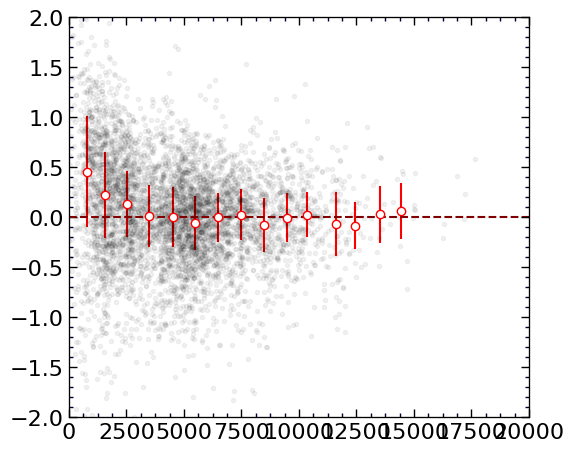

In [28]:
fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1

ax.plot(Vls, DM_W1-DM_75, 'k.', alpha=0.05)

X = Vls
Y = DM_W1-DM_75
# Z = Vls

X = X[Y>-100]
Y = Y[Y>-100]

# X = X[np.abs(Z)>4000]
# Y = Y[np.abs(Z)>4000]
# Z = Z[np.abs(Z)>4000]

# X = X[np.abs(Y)<2]
# Z = Z[np.abs(Y)<2]
# Y = Y[np.abs(Y)<2]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        
        xp = np.asarray(xp)
        yp = np.asarray(yp)
        
        Q1 = np.quantile(yp, 0.1)
        Q3 = np.quantile(yp, 0.9)
        
        xp = xp[((yp>Q1)&(yp<Q3))]
        yp = yp[((yp>Q1)&(yp<Q3))]
              
        if len(xp)>5:
            
            x  = np.median(xp)
            y  = np.median(yp)
            yerr = np.std(yp)

            ax.errorbar(x, y, yerr=yerr, fmt='o', 
                    color='red', ms=6, mfc='white') 
            
set_axes(ax, (0,20000), (-2,2))
ax.plot([0, 20000],[0,0], '--', color='maroon')


In [29]:
np.mean(Y)

0.030174946267050685

In [30]:
cf3 = pd.read_csv("../calibrators/cf3.csv", sep='|')

for col in cf3.columns:
    newcol = col.strip()
    cf3.rename(columns={col:newcol}, inplace=True)

cf3.set_index('PGC', inplace=True)

cf3['DM_cf3'] = cf3['DM']
cf3 = cf3[['DM_cf3']]

df34 = df_paper.join(cf3, how='inner')

/home/ehsan/anaconda3/envs/py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (5,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
def constant(x,delta):
    return delta

(array([-0.07272235]), array([[6.7838068e-05]]))
(-0.04671027342094192, 0.2951469797784563)


Text(2500,-2,'$\\Delta =-0.047\\pm0.295$ [mag]')

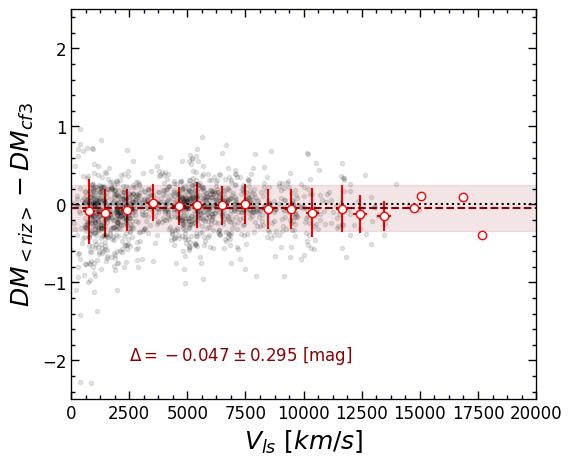

In [32]:
dff = df34[df34.Qs>2].dropna()

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.Vls.values
Y = dff.DMriz_fid.values-dff.DM_cf3.values

Ye = np.sqrt(dff.DMriz_err.values**2+0.4**2)

fit, cov = curve_fit(constant, X, Y, sigma=Ye)
print(fit, cov)

ax.plot(X, Y, 'k.', alpha=0.1)

X = X[Y<1]
Y = Y[Y<1]

X = X[Y>-1.5]
Y = Y[Y>-1.5]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6, mfc='white')   
        
ax.set_xlabel(r'$V_{ls} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{<riz>}-DM_{cf3}$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='k')

set_axes(ax, (0,20000), (-2.5,2.5), fontsize=12)

# ax.set_title("BTFR: W1-band")

med = np.median(Y)
std = np.std(Y-med)
y = np.asarray([med,med])
ax.plot([0,20000], y, '--', color='darkred')
ax.fill_between([0,20000], y+std, y-std, color='darkred', alpha=0.10)

print(med,std)

ax.text(2500, -2, r"$\Delta =" + '%.3f'%med+'\pm'+'%.3f'%std+'$'+ ' [mag]', color='darkred', fontsize=12)

(array([-0.05014911]), array([[6.58513156e-05]]))
(-0.017304085028793992, 0.2872399854073326)


Text(2500,-2,'$\\Delta =-0.017\\pm0.287$ [mag]')

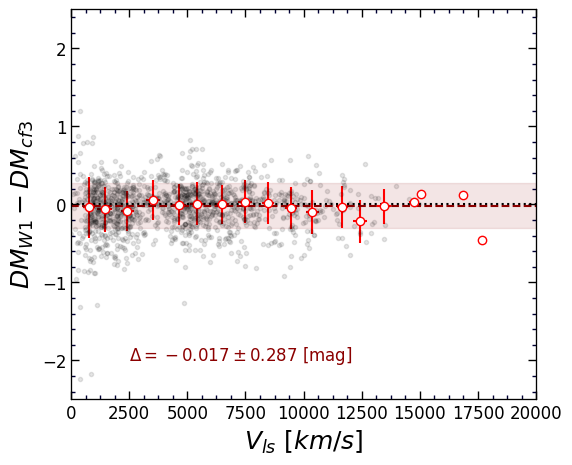

In [33]:
dff = df34[df34.Qw>2].dropna()

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.Vls.values
Y = dff.DM1_fid.values-dff.DM_cf3.values

Ye = np.sqrt(dff.DM1_err.values**2+0.4**2)

fit, cov = curve_fit(constant, X, Y, sigma=Ye)
print(fit, cov)

ax.plot(X, Y, 'k.', alpha=0.1)

X = X[Y<1]
Y = Y[Y<1]

X = X[Y>-1.5]
Y = Y[Y>-1.5]

for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6, mfc='white')   
        
ax.set_xlabel(r'$V_{ls} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{W1}-DM_{cf3}$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='k')

set_axes(ax, (0,20000), (-2.5,2.5), fontsize=12)

# ax.set_title("BTFR: W1-band")

med = np.median(Y)
std = np.std(Y-med)
y = np.asarray([med,med])
ax.plot([0,20000], y, '--', color='darkred')
ax.fill_between([0,20000], y+std, y-std, color='darkred', alpha=0.10)

print(med,std)

ax.text(2500, -2, r"$\Delta =" + '%.3f'%med+'\pm'+'%.3f'%std+'$'+ ' [mag]', color='darkred', fontsize=12)

(array([-0.02111014]), array([[1.07982708e-05]]))
(-0.021110142257512947, 0.13506909294017214)


Text(2500,-0.6,'$\\Delta =-0.021\\pm0.135$ [mag]')

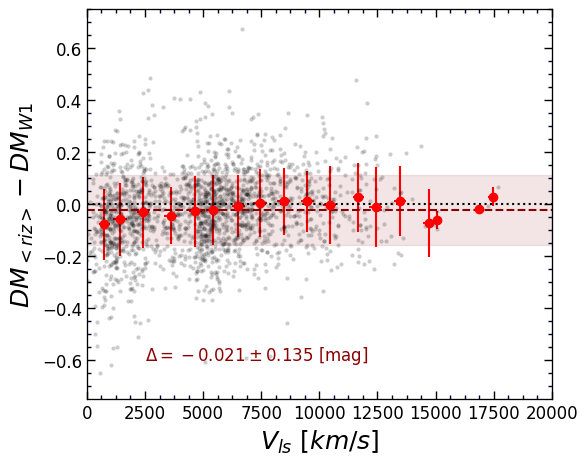

In [34]:
dff = df_paper[(df_paper.Qs>2)&(df_paper.Qw>3)].dropna() # 
# dff = df[(df.Qs>2)]

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = dff.Vls.values
Y = dff.DMriz_fid.values-dff.DM1_fid.values
Ye = np.sqrt(dff.DMriz_err.values**2+dff.DM1_err.values**2)

fit, cov = curve_fit(constant, X, Y, sigma=Ye)
print(fit, cov)

ax.plot(X, Y, 'k.', alpha=0.2, mfc='k', mec='none')

X = X[np.abs(Y)<0.40]
Y = Y[np.abs(Y)<0.40]


for i in np.arange(0,20000,1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)   
        
ax.set_xlabel(r'$V_{ls} \/\/[km/s]$', fontsize=18) 
# ax.set_ylabel(r'$DM_{75} - DM_{fid}$', fontsize=18)
ax.set_ylabel(r'$DM_{<riz>}-DM_{W1}$', fontsize=18)

ax.plot([0,20000], [0,0], ':', color='k')

set_axes(ax, (0,20000), (-.75,.75), fontsize=12)

# ax.set_title("BTFR: W1-band")

med = fit[0] #np.median(Y)
std = np.std(Y-fit[0])
y = np.asarray([med,med])
ax.plot([0,20000], y, '--', color='darkred')
ax.fill_between([0,20000], y+std, y-std, color='darkred', alpha=0.10)

print(med,std)

ax.text(2500, -0.6, r"$\Delta =" + '%.3f'%med+'\pm'+'%.3f'%std+'$'+ ' [mag]', color='darkred', fontsize=12)

In [35]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

In [50]:
def myHubble(D, H0):
    return H0    


def plotHubble(ax, X, Y, Ye, band="", color='red'):
       
    ax.plot(X, 10**Y, 'k.', alpha=0.05, mec='white', ms=5)
    
#     m = np.median(Y[X>4000])
#     e1 = np.std(Y[X>4000])/np.sqrt(len(Y[X>4000])) 
#     e2 = m/np.sqrt(len(Y[X>4000])) 
#     e = np.sqrt(e1**2)
#     H0e_fit = 10**m*e*np.log(10)    
    
    for i in np.arange(0,18000, 1000):
        xp = []
        yp = []
        ype  = []
        for ii in range(len(X)):
            xi = X[ii]
            if xi>=i and xi<i+1000 and Y[ii]>-10000: #and Ye[ii]>0:
                xp.append(xi)
                yp.append(Y[ii])
                ype.append(Ye[ii])
        if len(xp)>2:
            yp = np.asarray(yp)
            ype = np.asarray(ype)
            
            fit, cov = curve_fit(myHubble, xp, yp, sigma=ype)
            yy = fit[0]
            e = np.sqrt(cov[0])
            H0e_fit = (10**yy)*np.log(10.)*np.sqrt(cov[0])
            H0 = 10**yy  
    
            if np.median(xp)>4000:
                ax.errorbar(i+500, 10**yy, yerr=H0e_fit, xerr=np.std(xp), fmt='o', 
                        color=color, ms=5, capsize=2)     
            else:
                ax.errorbar(i+500, 10**yy, yerr=H0e_fit, xerr=np.std(xp), fmt='o', 
                        color=color, ms=5, capsize=2)  
            

    
    fit, cov = curve_fit(myHubble, X[X>4000], Y[X>4000], sigma=Ye[X>4000])
    yy = fit[0]
    sigma = np.std(Y[X>4000]-yy)
    
    
    ind = ((X>4000)&(np.abs(Y-yy)<3.5*sigma))
    fit, cov = curve_fit(myHubble, X[ind], Y[ind], sigma=Ye[ind])
    yy = fit[0]
    H0e_fit = (10**yy)*np.log(10.)*np.sqrt(cov[0])
    H0 = 10**yy  

    ax.plot([4000,20000], [H0, H0], '--', color='blue')

    x_ax, y_ax = set_axes(ax, (0,20000), (35,150), fontsize=14) 

    ax.set_yscale('log')

    from matplotlib.ticker import MultipleLocator

    from matplotlib.ticker import NullFormatter
    
    ax.set_yticks(np.arange(30,150, step=30))
    ax.yaxis.set_major_formatter(NullFormatter())  
    ax.yaxis.set_minor_formatter(NullFormatter())

    ax.yaxis.set_major_locator(MultipleLocator(30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))

    plt.yticks([40, 70, 100, 130], ('40', '70', '100','130'))


    y_ax.set_yticks(np.arange(30,150, step=30))
    y_ax.set_yscale('log')
    y_ax.yaxis.set_major_formatter(NullFormatter())  
    y_ax.yaxis.set_minor_formatter(NullFormatter())
    y_ax.yaxis.set_major_locator(MultipleLocator(30))
    y_ax.yaxis.set_minor_locator(MultipleLocator(10))


    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.80*Xlm[0]+0.20*Xlm[1]
    y0 = 0.95*Ylm[0]+0.05*Ylm[1] 
    unit= '   km/s/Mpc'
    ax.text(x0,y0, r"$ \langle H_0 \rangle_{"+band+"}= $"+"%.1f" % H0+'$\pm$'+"%.1f" % H0e_fit+unit, fontsize=14, 
            color='blue', backgroundcolor='white')

    ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))



/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in log10
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in log10
/media/Data/Hom

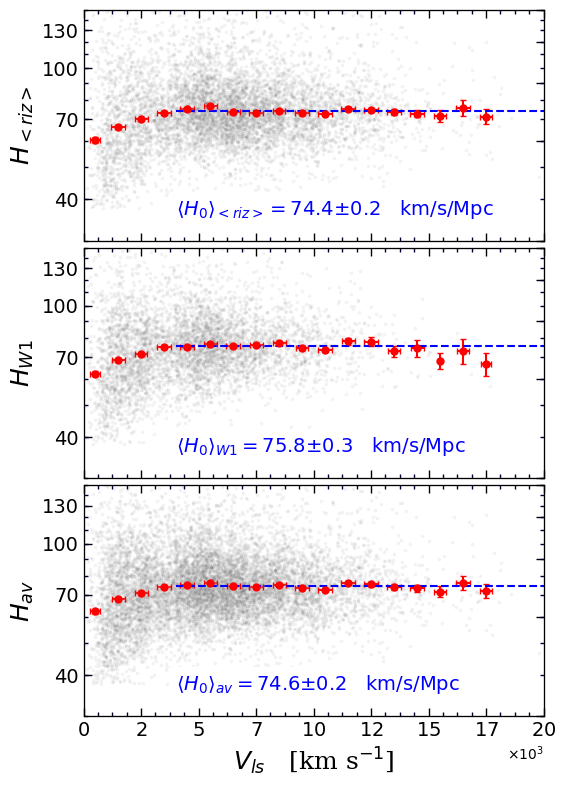

In [55]:
fig = py.figure(figsize=(5, 11.8), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

####################################################
####################################################
ax = plt.subplot(gs[p]) ; p+=1

dff = df_paper[(df_paper.Qs>2)&(df_paper.logWimx>0)][["Vls","f_cosmology","DMriz_fid","eDMriz_adj"]].dropna()
X = dff.Vls.values
Y  = np.log10(dff.Vls.values*dff.f_cosmology.values)-(dff.DMriz_fid.values-25)/5.
Ye = dff.eDMriz_adj.values/5.

Y0 = dff.Vls.values*dff.f_cosmology.values
DM_75 = 5*np.log10(Y0/75.)+25.
Y0 = DM_75-dff.DMriz_fid.values

ind, = np.where(np.abs(Y0)<1.5)

plotHubble(ax, X[ind], Y[ind], Ye[ind], band="<riz>")
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{<riz>}$', fontsize=18, fontdict=font) 
# ####################################################
ax = plt.subplot(gs[p]) ; p+=1

dff = df_paper[(df_paper.Qw>2)&(df_paper.logWimx>0)][["Vls","f_cosmology","DM1_fid","eDM1_adj"]].dropna()
X = dff.Vls.values
Y  = np.log10(dff.Vls.values*dff.f_cosmology.values)-(dff.DM1_fid.values-25)/5.
Ye = dff.eDM1_adj.values/5.

Y0 = dff.Vls.values*dff.f_cosmology.values
DM_75 = 5*np.log10(Y0/75.)+25.
Y0 = DM_75-dff.DM1_fid.values

ind, = np.where(np.abs(Y0)<1.5)
plotHubble(ax, X[ind], Y[ind], Ye[ind], band="W1")
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{W1}$', fontsize=18, fontdict=font) 

####################################################
ax = plt.subplot(gs[p]) ; p+=1

dff = df_paper[((df_paper.Qw>2)|(df_paper.Qs>2))&(df_paper.logWimx>0)][["Vls","f_cosmology","DM_av","eDM_adj"]].dropna()
X = dff.Vls.values#*dff.f_cosmology.values
Y  = np.log10(dff.Vls.values*dff.f_cosmology.values)-(dff.DM_av.values-25)/5.
Ye = dff.eDM_adj.values/5.

Y0 = dff.Vls.values*dff.f_cosmology.values
DM_75 = 5*np.log10(Y0/75.)+25.
Y0 = DM_75-dff.DM_av.values

ind, = np.where(np.abs(Y0)<1.5)
plotHubble(ax, X[ind], Y[ind], Ye[ind], band="av")
# plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{av}$', fontsize=18, fontdict=font) 



ax.set_xlabel(r'$V_{ls} $'+'   [km s'+r'$^{-1}$'+']', fontsize=18, fontdict=font) 


plt.subplots_adjust(hspace=0.03, wspace=0.2)